# Dataset



*   Remember to select GPU "Edit" -> "Notebook settings" -> "Hardware Acceleration"



Load MINST dataset and partition the data to training and validation (you can choose the validation_split size when training network later - it is more convenient that way as you have all necessary hyper-parameters at the same place )

Rescale the data so it is it between 0 and 1. In this case data-set images are in RGB, therefore divide by 255.

In [3]:
!pip install keras
!pip install tensorflow
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
classes = np.unique(test_labels)


test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_labels = to_categorical(test_labels)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
print('Total number of outputs : ', classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.2 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 55.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 76.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 81.8 MB/s eta 0:00:0

2023-11-27 06:21:22.155016: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 06:21:22.219774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 06:21:22.219843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 06:21:22.221344: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 06:21:22.230480: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 06:21:22.231484: I tensorflow/core/platform/cpu_feature_guard.cc:1

11490434/11490434 [==============================] - 2s 0us/step
Training data shape :  (60000, 28, 28, 1) (60000, 10)
Testing data shape :  (10000, 28, 28, 1) (10000, 10)
Total number of outputs :  [0 1 2 3 4 5 6 7 8 9]


# Network

*  The first layer will have 32-3 x 3 filters,
*   The second layer will have 64-3 x 3 filters and
*  The third layer will have 128-3 x 3 filters.


Convnet (Conv2D), has input tensors of shape (image_height, image_width, image_channels). 

MINST images have shape of (28, 28, 1), therefore first layer will have input_shape=(28, 28, 1).

Each layer contains max-pooling layers of size 2 x 2 (or 3x3 or 5x5) (down-sampling layers).

Flatten serves as a connection between the convolution and dense layers.

Dense layer type is standard used for output layers.

Activation functions - https://keras.io/activations/  - final layer activation has to be "softmax" because we  want to clasifty outputs, other layers can have Sigmoid, RELU, LeakyReLU...

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [8]:
print(trained_model.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Training

Optimizer -  https://keras.io/optimizers/  (SGD, RMSprop, Adadelta)

Loss - https://keras.io/losses/

Metrics - https://keras.io/metrics/

Batch size: 4, 8, 16, 32, 64, 128, 256, 512

In [10]:
model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

trained_model = model.fit(train_images, train_labels, epochs=25, batch_size=256, validation_split=0.25) 




test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest loss: ', test_loss)
print('Test accuracy: ', test_acc)

Epoch 1/25
176/176 [==============================] - 6s 29ms/step - loss: 2.0585 - accuracy: 0.6436 - val_loss: 2.0438 - val_accuracy: 0.6578
Epoch 2/25
176/176 [==============================] - 5s 26ms/step - loss: 2.0370 - accuracy: 0.6520 - val_loss: 2.0205 - val_accuracy: 0.6653
Epoch 3/25
176/176 [==============================] - 5s 27ms/step - loss: 2.0127 - accuracy: 0.6583 - val_loss: 1.9944 - val_accuracy: 0.6709
Epoch 4/25
176/176 [==============================] - 5s 26ms/step - loss: 1.9854 - accuracy: 0.6640 - val_loss: 1.9653 - val_accuracy: 0.6776
Epoch 5/25
176/176 [==============================] - 4s 25ms/step - loss: 1.9551 - accuracy: 0.6705 - val_loss: 1.9329 - val_accuracy: 0.6847
Epoch 6/25
176/176 [==============================] - 5s 26ms/step - loss: 1.9216 - accuracy: 0.6789 - val_loss: 1.8971 - val_accuracy: 0.6892
Epoch 7/25
176/176 [==============================] - 5s 26ms/step - loss: 1.8845 - accuracy: 0.6843 - val_loss: 1.8577 - val_accuracy: 0.6972

# Results

Plot the training accuracy and loss for every epoch.

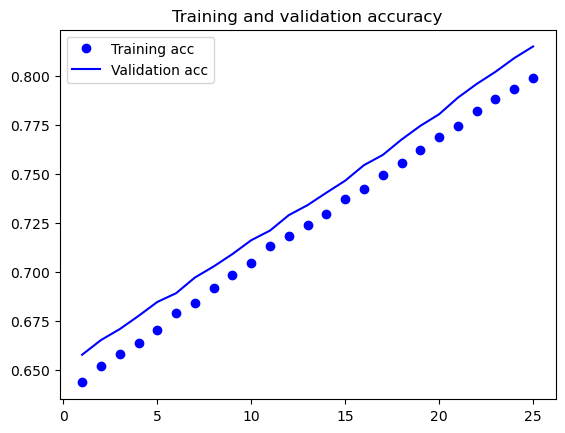

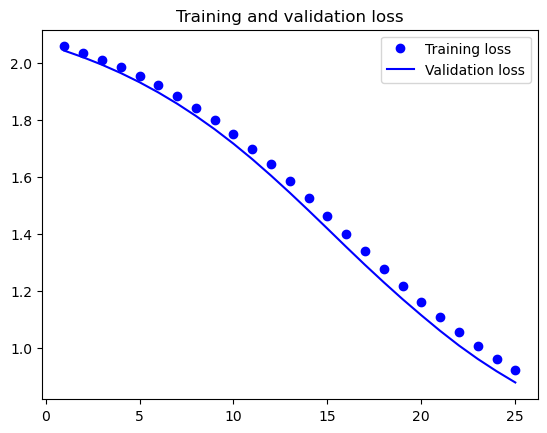

In [11]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

To visualize the input and predictions, run the following code. You can re-run it to get another 4 random numbers.

1/1 [==============================] - 0s 29ms/step


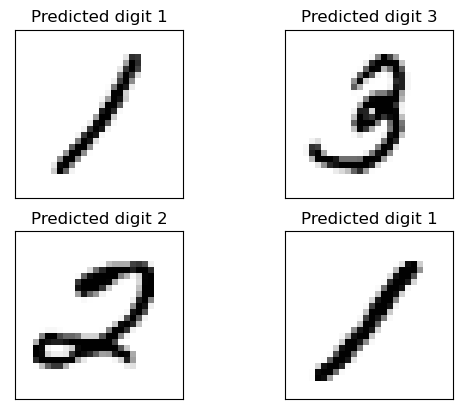

In [12]:
i=random.randint(1,9997)


plt.subplot(221)
plt.imshow(test_images[i].reshape(28, 28), cmap='Greys')
pred0 = model.predict(test_images[i].reshape(1, 28, 28, 1))
plt.title('Predicted digit ' + str(pred0.argmax()))
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(test_images[i+1].reshape(28, 28), cmap='Greys')
pred1 = model.predict(test_images[i+1].reshape(1, 28, 28, 1))
plt.title('Predicted digit ' + str(pred1.argmax()))
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.imshow(test_images[i+2].reshape(28, 28), cmap='Greys')
pred2 = model.predict(test_images[i+2].reshape(1, 28, 28, 1))
plt.title('Predicted digit ' + str(pred2.argmax()))
plt.xticks([])
plt.yticks([])
plt.subplot(224)
plt.imshow(test_images[i+3].reshape(28, 28), cmap='Greys')
pred3 = model.predict(test_images[i+3].reshape(1, 28, 28, 1))
plt.title('Predicted digit ' + str(pred3.argmax()))
plt.xticks([])
plt.yticks([])
# show the plot

plt.show()